In [2]:
import networkx as nx
import numpy as np 
import pandas as pd
import regex as re
import requests
import matplotlib.pyplot as plt
from scipy import stats
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


In [3]:
data = pd.read_csv('sp500_Sep2020.csv', encoding="cp1252")
data.head()

,symbol,datekey,close,previous_close,percent_diff,direction,company_name,sector
0,A,d1,101.120003,100.419998,0.0070,Same,Agilent Technologies Inc,Health Care
1,A,d2,103.419998,101.120003,0.0227,Same,Agilent Technologies Inc,Health Care
2,A,d3,99.639999,103.419998,-0.0365,Down,Agilent Technologies Inc,Health Care
3,A,d4,96.839996,99.639999,-0.0281,Same,Agilent Technologies Inc,Health Care
4,A,d8,95.139999,96.839996,-0.0176,Same,Agilent Technologies Inc,Health Care


In [83]:
sp500 = [data.symbol.unique()][0]

In [4]:
# all_data = pd.DataFrame(columns=['Date','Open','High','Low','Close','Adj Close','Volume','symbol'])
all_data = pd.read_csv('sp500_2122.csv')

In [87]:
# base = 'https://www.finance.yahoo.com/quote/'
# midend = '/history?p='
# hist_links = [base + tick + midend + tick for tick in sp500]

In [ ]:
# i = 0
# for url in hist_links:
#     browser = webdriver.Chrome(executable_path='/Users/lelee1/Desktop/I606/chromedriver')
#     browser.get(url)
#     soup = BeautifulSoup(browser.page_source)
#     tick = sp500[i]
#     try:
#         for a in soup.find_all('a', class_ = 'Fl(end) Mt(3px) Cur(p)'):
#             df = pd.read_csv(a.get('href'))
#             df = df.assign(symbol = str(tick))
#             all_data = all_data.append(df, ignore_index=True)
#     except:
#         pass
#     i += 1
    

In [127]:
# all_data.to_csv('sp500_2122.csv', index = False)

In [5]:
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
0,2021-05-03,134.289993,134.309998,132.610001,133.190002,132.467026,1032000,A
1,2021-05-04,132.119995,132.509995,130.350006,130.899994,130.189438,1752400,A
2,2021-05-05,132.089996,134.089996,131.250000,133.369995,132.646042,1430600,A
3,2021-05-06,132.309998,132.600006,130.770004,132.399994,131.681305,1150400,A
4,2021-05-07,133.190002,134.820007,133.190002,133.899994,133.173157,1044200,A
...,...,...,...,...,...,...,...,...
115639,2022-04-27,177.929993,180.229996,177.059998,178.470001,178.470001,1621200,ZTS
115640,2022-04-28,179.080002,182.220001,178.179993,181.309998,181.309998,2339000,ZTS
115641,2022-04-29,180.000000,181.860001,176.789993,177.250000,177.250000,2251800,ZTS
115642,2022-05-02,176.389999,177.250000,171.550003,174.669998,174.669998,3513000,ZTS


In [6]:
pd.DataFrame({'date_count': all_data.groupby(['symbol']).size()}).\
sort_values(by=["date_count","symbol"], ascending= [False,True]).\
reset_index()

,symbol,date_count
0,A,327
1,AAL,255
2,AAP,254
3,AAPL,254
4,ABBV,254
...,...,...
450,YUM,254
451,ZBH,254
452,ZBRA,254
453,ZION,254


In [7]:
df = all_data[['Date','Close','symbol']]
df['pct_change'] = df.groupby(['symbol'])['Close'].pct_change()

/var/folders/lh/tw7lgns53bsgp8s5xtzzd4rw0000gp/T/ipykernel_76575/2090116681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_change'] = df.groupby(['symbol'])['Close'].pct_change()


In [8]:
stock_info = data[['symbol','company_name','sector']].drop_duplicates()

In [9]:
df = df.merge(stock_info, on = 'symbol')

In [13]:
df = df.drop_duplicates().dropna()

In [14]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst = True)
df

,Date,Close,symbol,pct_change,company_name,sector
1,2021-05-04,130.899994,A,-0.017194,Agilent Technologies Inc,Health Care
2,2021-05-05,133.369995,A,0.018869,Agilent Technologies Inc,Health Care
3,2021-05-06,132.399994,A,-0.007273,Agilent Technologies Inc,Health Care
4,2021-05-07,133.899994,A,0.011329,Agilent Technologies Inc,Health Care
5,2021-05-10,131.869995,A,-0.015161,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...
115639,2022-04-27,178.470001,ZTS,0.008476,Zoetis,Health Care
115640,2022-04-28,181.309998,ZTS,0.015913,Zoetis,Health Care
115641,2022-04-29,177.250000,ZTS,-0.022393,Zoetis,Health Care
115642,2022-05-02,174.669998,ZTS,-0.014556,Zoetis,Health Care


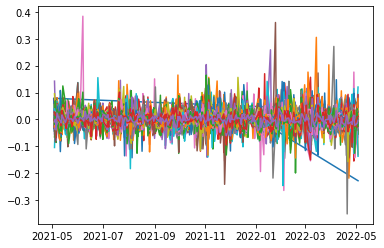

In [176]:
for stock in df['symbol'].unique():
    x = df[df['symbol'] == stock]
    plt.plot(x['Date'], x['pct_change'])

In [15]:
df.to_csv('sp500_manipulated.csv', index = False)

In [16]:
df_wide = df.pivot_table(index = 'Date', columns = 'symbol', values = 'pct_change').dropna()

In [18]:
df_wide.to_csv('sp500_wide.csv', index = False)

In [189]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [193]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [194]:
pvals = calculate_pvalues(df_wide)
corrs = df_wide.corr()

In [195]:
significant_pairs = pvals[pvals < 0.05].unstack().dropna()

In [196]:
significant_pairs

     symbol
A    A            0.0
     AAL       0.0044
     AAP          0.0
     AAPL         0.0
     ABBV      0.0452
                ...  
ZTS  XYL          0.0
     YUM          0.0
     ZBH        0.006
     ZBRA         0.0
     ZTS          0.0
Length: 174801, dtype: object

In [197]:
sdf = significant_pairs.to_frame()
sdf.index = sdf.index.rename(['symbol1','symbol2'])
sdf = sdf.reset_index()

cdf = corrs.unstack().to_frame()
cdf.index = cdf.index.rename(['symbol1','symbol2'])
cdf = cdf.reset_index()

In [198]:
joined = sdf.merge(cdf, on = ['symbol1','symbol2'])
joined = joined.rename(columns = {'0_x':'pval','0_y':'weight'})

In [201]:
x = nx.from_pandas_edgelist(joined, source = 'symbol1', target='symbol2',edge_attr=['pval','weight'])

In [202]:
node_props = data[['symbol','company_name','sector']].drop_duplicates().reset_index(drop = True)
xattrs = node_props.set_index('symbol').to_dict('index')
nx.set_node_attributes(x, xattrs)

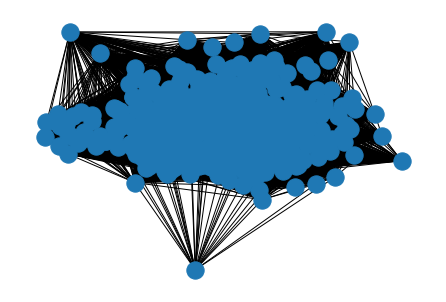

In [204]:
x.remove_edges_from(nx.selfloop_edges(x))
nx.draw(x)

In [205]:
nx.write_gml(x, path = '/Users/lelee1/Desktop/I606/stocksci.gml')